## IMDB / TMDB Notebook


In this notebook, we will use data from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers to gain insight on how the new Microsoft Movie studio should proceed in content creation to maximize ratings, reviews, and profit. The data we are using is important and helpful to this case because the information within the data can help us narrow down which genres of movies were well received and yielded higher ratings and grossed higher earnings.

So it looks like we need to join/merge the different tables so we can get the names/ratings/reviews etc matching

ratings with titles on tconstant

once we have the titles we can join the other sets that have the movie names

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls

ev_imdb_tmdb_notebook.ipynb
project_notebook_ajc.ipynb


## Importing Data

In [3]:
imdb_ratings = pd.read_csv('../zippedData/imdb.title.ratings.csv.gz')
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
imdb_ratings

tconst  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]

In [5]:
imdb_name_basics = pd.read_csv('../zippeddata/imdb.name.basics.csv.gz')
imdb_name_basics

nconst         primary_name  birth_year  death_year  \
0       nm0061671    Mary Ellen Bauder         NaN         NaN   
1       nm0061865         Joseph Bauer         NaN         NaN   
2       nm0062070           Bruce Baum         NaN         NaN   
3       nm0062195         Axel Baumann         NaN         NaN   
4       nm0062798          Pete Baxter         NaN         NaN   
...           ...                  ...         ...         ...   
606643  nm9990381         Susan Grobes         NaN         NaN   
606644  nm9990690          Joo Yeon So         NaN         NaN   
606645  nm9991320       Madeline Smith         NaN         NaN   
606646  nm9991786  Michelle Modigliani         NaN         NaN   
606647  nm9993380       Pegasus Envoyé         NaN         NaN   

                                      primary_profession  \
0              miscellaneous,production_manager,producer   
1             composer,music_department,sound_department   
2                             miscellaneous,actor,writer   
3       camera_department,cinematographer,art_department   
4       production_designer,art_department,set_decorator   
...                                                  ...   
606643                                           actress   
606644                                           actress   
606645                                           actress   
606646                                          producer   
606647                             director,actor,writer   

                               known_for_titles  
0       tt0837562,tt2398241,tt0844471,tt0118553  
1       tt0896534,tt6791238,tt0287072,tt1682940  
2       tt1470654,tt0363631,tt0104030,tt0102898  
3       tt0114371,tt2004304,tt1618448,tt1224387  
4       tt0452644,tt0452692,tt3458030,tt2178256  
...                                         ...  
606643                                      NaN  
606644                      tt9090932,tt8737130  
606645                      tt8734436,tt9615610  
606646                                      NaN  
606647                                tt8743182  

[606648 rows x 6 columns]

In [6]:
imdb_principals = pd.read_csv('../zippeddata/imdb.title.principals.csv.gz')
imdb_principals

tconst  ordering      nconst  category       job  \
0        tt0111414         1   nm0246005     actor       NaN   
1        tt0111414         2   nm0398271  director       NaN   
2        tt0111414         3   nm3739909  producer  producer   
3        tt0323808        10   nm0059247    editor       NaN   
4        tt0323808         1   nm3579312   actress       NaN   
...            ...       ...         ...       ...       ...   
1028181  tt9692684         1   nm0186469     actor       NaN   
1028182  tt9692684         2   nm4929530      self       NaN   
1028183  tt9692684         3  nm10441594  director       NaN   
1028184  tt9692684         4   nm6009913    writer    writer   
1028185  tt9692684         5  nm10441595  producer  producer   

                   characters  
0                 ["The Man"]  
1                         NaN  
2                         NaN  
3                         NaN  
4            ["Beth Boothby"]  
...                       ...  
1028181  ["Ebenezer Scrooge"]  
1028182   ["Herself","Regan"]  
1028183                   NaN  
1028184                   NaN  
1028185                   NaN  

[1028186 rows x 6 columns]

In [7]:
imdb_akas = pd.read_csv('../zippeddata/imdb.title.akas.csv.gz')
imdb_akas

title_id  ordering                                    title region  \
0       tt0369610        10                            Джурасик свят     BG   
1       tt0369610        11                        Jurashikku warudo     JP   
2       tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3       tt0369610        13                  O Mundo dos Dinossauros     BR   
4       tt0369610        14                           Jurassic World     FR   
...           ...       ...                                      ...    ...   
331698  tt9827784         2                       Sayonara kuchibiru    NaN   
331699  tt9827784         3                            Farewell Song    XWW   
331700  tt9880178         1                              La atención    NaN   
331701  tt9880178         2                              La atención     ES   
331702  tt9880178         3                            The Attention    XWW   

       language        types   attributes  is_original_title  
0            bg          NaN          NaN                0.0  
1           NaN  imdbDisplay          NaN                0.0  
2           NaN  imdbDisplay          NaN                0.0  
3           NaN          NaN  short title                0.0  
4           NaN  imdbDisplay          NaN                0.0  
...         ...          ...          ...                ...  
331698      NaN     original          NaN                1.0  
331699       en  imdbDisplay          NaN                0.0  
331700      NaN     original          NaN                1.0  
331701      NaN          NaN          NaN                0.0  
331702       en  imdbDisplay          NaN                0.0  

[331703 rows x 8 columns]

In [8]:
imdb_akas.rename(columns = {'title_id': 'tconst'}, inplace=True)
imdb_akas

tconst  ordering                                    title region  \
0       tt0369610        10                            Джурасик свят     BG   
1       tt0369610        11                        Jurashikku warudo     JP   
2       tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3       tt0369610        13                  O Mundo dos Dinossauros     BR   
4       tt0369610        14                           Jurassic World     FR   
...           ...       ...                                      ...    ...   
331698  tt9827784         2                       Sayonara kuchibiru    NaN   
331699  tt9827784         3                            Farewell Song    XWW   
331700  tt9880178         1                              La atención    NaN   
331701  tt9880178         2                              La atención     ES   
331702  tt9880178         3                            The Attention    XWW   

       language        types   attributes  is_original_title  
0            bg          NaN          NaN                0.0  
1           NaN  imdbDisplay          NaN                0.0  
2           NaN  imdbDisplay          NaN                0.0  
3           NaN          NaN  short title                0.0  
4           NaN  imdbDisplay          NaN                0.0  
...         ...          ...          ...                ...  
331698      NaN     original          NaN                1.0  
331699       en  imdbDisplay          NaN                0.0  
331700      NaN     original          NaN                1.0  
331701      NaN          NaN          NaN                0.0  
331702       en  imdbDisplay          NaN                0.0  

[331703 rows x 8 columns]

In [9]:
imdb_crew = pd.read_csv('../zippedData/imdb.title.crew.csv.gz')
imdb_crew

tconst                      directors              writers
0       tt0285252                      nm0899854            nm0899854
1       tt0438973                            NaN  nm0175726,nm1802864
2       tt0462036                      nm1940585            nm1940585
3       tt0835418                      nm0151540  nm0310087,nm0841532
4       tt0878654  nm0089502,nm2291498,nm2292011            nm0284943
...           ...                            ...                  ...
146139  tt8999974                     nm10122357           nm10122357
146140  tt9001390                      nm6711477            nm6711477
146141  tt9001494          nm10123242,nm10123248                  NaN
146142  tt9004986                      nm4993825            nm4993825
146143  tt9010172                            NaN            nm8352242

[146144 rows x 3 columns]

In [10]:
tmdb_movies = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=0)
tmdb_movies = tmdb_movies.drop('id', axis=1)
tmdb_movies

genre_ids original_language  \
0          [12, 14, 10751]                en   
1      [14, 12, 16, 10751]                en   
2            [12, 28, 878]                en   
3          [16, 35, 10751]                en   
4            [28, 878, 12]                en   
...                    ...               ...   
26512             [27, 18]                en   
26513             [18, 53]                en   
26514         [14, 28, 12]                en   
26515      [10751, 12, 28]                en   
26516             [53, 27]                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3                                         Toy Story      28.005   1995-11-22   
4                                         Inception      27.920   2010-07-16   
...                                             ...         ...          ...   
26512                         Laboratory Conditions       0.600   2018-10-13   
26513                               _EXHIBIT_84xxx_       0.600   2018-05-01   
26514                                  The Last One       0.600   2018-10-01   
26515                                  Trailer Made       0.600   2018-06-22   
26516                                    The Church       0.600   2018-10-05   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                          How to Train Your Dragon           7.7        7610  
2                                        Iron Man 2           6.8       12368  
3                                         Toy Story           7.9       10174  
4                                         Inception           8.3       22186  
...                                             ...           ...         ...  
26512                         Laboratory Conditions           0.0           1  
26513                               _EXHIBIT_84xxx_           0.0           1  
26514                                  The Last One           0.0           1  
26515                                  Trailer Made           0.0           1  
26516                                    The Church           0.0           1  

[26517 rows x 8 columns]

## Merging ratings dataset with titles

Here we merged the two datasets on the 'tconst' / 'titleid'

In [11]:
imdb_df = pd.merge(imdb_ratings, imdb_akas, on='tconst', how='inner')
imdb_df.head()

tconst  averagerating  numvotes  ordering                      title  \
0  tt1042974            6.4        20         1                  Just Inès   
1  tt1042974            6.4        20         2                  Samo Ines   
2  tt1042974            6.4        20         3                  Just Inès   
3  tt1043726            4.2     50352        10     The Legend of Hercules   
4  tt1043726            4.2     50352        11  Hércules - A Lenda Começa   

  region language        types attributes  is_original_title  
0    NaN      NaN     original        NaN                1.0  
1     RS      NaN  imdbDisplay        NaN                0.0  
2     GB      NaN          NaN        NaN                0.0  
3    NaN      NaN     original        NaN                1.0  
4     PT      NaN  imdbDisplay        NaN                0.0

## Filtering out extra names

We made the decision to select the united states region and filter out the duplicates to get a single name

In [12]:
imdb_df = imdb_df.sort_values(by='averagerating', ascending=False)
imdb_df = imdb_df[imdb_df['region'] == 'US']
imdb_df = imdb_df[imdb_df['attributes'] != 'fake working title']
imdb_df = imdb_df[imdb_df['attributes'] != 'informal short title']
imdb_df = imdb_df[imdb_df['attributes'] != 'promotional title']
imdb_df = imdb_df[imdb_df['types'] != 'working']
imdb_df = imdb_df[imdb_df['attributes'] != 'IMAX version']
imdb_df = imdb_df[imdb_df['attributes'] != 'poster title']
imdb_df = imdb_df[imdb_df['attributes'] != 'informal title']
imdb_df = imdb_df[imdb_df['attributes'] != '3-D version']
imdb_df = imdb_df[imdb_df['attributes'] != 'director\'s cut']
imdb_df = imdb_df[imdb_df['attributes'] != 'alternative spelling']
imdb_df = imdb_df[imdb_df['attributes'] != 'informal alternative title']
imdb_df = imdb_df[imdb_df['attributes'] != 'long title']
imdb_df = imdb_df[imdb_df['attributes'] != 'short title']
imdb_df = imdb_df[imdb_df['types'] != 'alternative']
imdb_df = imdb_df.sort_values(by='language', ascending =True)
imdb_df = imdb_df.sort_values(by='numvotes', ascending=False)
imdb_df

tconst  averagerating  numvotes  ordering  \
226156  tt1375666            8.8   1841066         8   
226128  tt1375666            8.8   1841066        24   
89785   tt0816692            8.6   1299334         2   
89768   tt0816692            8.6   1299334        14   
137305  tt1853728            8.4   1211405        11   
...           ...            ...       ...       ...   
5985    tt1737074            6.6         5         1   
168211  tt3908356            6.6         5         1   
121140  tt5684662            6.6         5         1   
187022  tt3904112            6.6         5         1   
116854  tt2132412            7.8         5         1   

                                                  title region language  \
226156                                        Inception     US       en   
226128                                        Inception     US      NaN   
89785                                      Interstellar     US       en   
89768                                      Interstellar     US      NaN   
137305                                 Django Unchained     US      NaN   
...                                                 ...    ...      ...   
5985    A Jazzman's Jazzman: The Gerry Carruthers Story     US      NaN   
168211                                 Death 2 Hipsters     US      NaN   
121140                          Two Guns and a Body Bag     US      NaN   
187022                                Listening to Rain     US      NaN   
116854                                     One Mountain     US      NaN   

              types attributes  is_original_title  
226156          NaN        NaN                0.0  
226128  imdbDisplay        NaN                0.0  
89785           NaN        NaN                0.0  
89768           NaN        NaN                0.0  
137305  imdbDisplay        NaN                0.0  
...             ...        ...                ...  
5985            NaN        NaN                0.0  
168211          NaN        NaN                0.0  
121140          NaN        NaN                0.0  
187022          NaN        NaN                0.0  
116854          NaN        NaN                0.0  

[27005 rows x 10 columns]

Dropping the duplicates and keeping the first one from 'tconst' as we sorted by number of votes and language

In [13]:
imdb_df = imdb_df.drop_duplicates(subset=['tconst'], keep='first')
imdb_df

tconst  averagerating  numvotes  ordering  \
226156  tt1375666            8.8   1841066         8   
89785   tt0816692            8.6   1299334         2   
137305  tt1853728            8.4   1211405        11   
170409  tt0848228            8.1   1183655        36   
141391  tt0993846            8.2   1035358        12   
...           ...            ...       ...       ...   
5985    tt1737074            6.6         5         1   
168211  tt3908356            6.6         5         1   
121140  tt5684662            6.6         5         1   
187022  tt3904112            6.6         5         1   
116854  tt2132412            7.8         5         1   

                                                  title region language  \
226156                                        Inception     US       en   
89785                                      Interstellar     US       en   
137305                                 Django Unchained     US      NaN   
170409                                     The Avengers     US      NaN   
141391                          The Wolf of Wall Street     US      NaN   
...                                                 ...    ...      ...   
5985    A Jazzman's Jazzman: The Gerry Carruthers Story     US      NaN   
168211                                 Death 2 Hipsters     US      NaN   
121140                          Two Guns and a Body Bag     US      NaN   
187022                                Listening to Rain     US      NaN   
116854                                     One Mountain     US      NaN   

              types attributes  is_original_title  
226156          NaN        NaN                0.0  
89785           NaN        NaN                0.0  
137305  imdbDisplay        NaN                0.0  
170409  imdbDisplay        NaN                0.0  
141391  imdbDisplay        NaN                0.0  
...             ...        ...                ...  
5985            NaN        NaN                0.0  
168211          NaN        NaN                0.0  
121140          NaN        NaN                0.0  
187022          NaN        NaN                0.0  
116854          NaN        NaN                0.0  

[26050 rows x 10 columns]

## Merging the movies database to our imdb dataframe on title

Here we merged the two different datasets to get the other information to match in the table

In [14]:
imdb_df = pd.merge(imdb_df, tmdb_movies, on='title', how='inner')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 0 to 12740
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             12741 non-null  object 
 1   averagerating      12741 non-null  float64
 2   numvotes           12741 non-null  int64  
 3   ordering           12741 non-null  int64  
 4   title              12741 non-null  object 
 5   region             12741 non-null  object 
 6   language           119 non-null    object 
 7   types              1824 non-null   object 
 8   attributes         296 non-null    object 
 9   is_original_title  12741 non-null  float64
 10  genre_ids          12741 non-null  object 
 11  original_language  12741 non-null  object 
 12  original_title     12741 non-null  object 
 13  popularity         12741 non-null  float64
 14  release_date       12741 non-null  object 
 15  vote_average       12741 non-null  float64
 16  vote_count         127

** see what data was lost and try to find pattern in what was lost

## Dropping duplicates

In [15]:
imdb_df = imdb_df.drop_duplicates(subset=['tconst'], keep='first')
imdb_df = imdb_df.drop_duplicates(subset=['title'], keep='first')

In [16]:
imdb_df.keys()

Index(['tconst', 'averagerating', 'numvotes', 'ordering', 'title', 'region',
       'language', 'types', 'attributes', 'is_original_title', 'genre_ids',
       'original_language', 'original_title', 'popularity', 'release_date',
       'vote_average', 'vote_count'],
      dtype='object')

In [17]:
imdb_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10383 entries, 0 to 12740
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             10383 non-null  object 
 1   averagerating      10383 non-null  float64
 2   numvotes           10383 non-null  int64  
 3   ordering           10383 non-null  int64  
 4   title              10383 non-null  object 
 5   region             10383 non-null  object 
 6   language           91 non-null     object 
 7   types              1448 non-null   object 
 8   attributes         227 non-null    object 
 9   is_original_title  10383 non-null  float64
 10  genre_ids          10383 non-null  object 
 11  original_language  10383 non-null  object 
 12  original_title     10383 non-null  object 
 13  popularity         10383 non-null  float64
 14  release_date       10383 non-null  object 
 15  vote_average       10383 non-null  float64
 16  vote_count         103

## dropping extra columns

In [18]:
imdb_df = imdb_df.drop(['original_title', 'attributes', 'types'], axis=1)

In [19]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10383 entries, 0 to 12740
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             10383 non-null  object 
 1   averagerating      10383 non-null  float64
 2   numvotes           10383 non-null  int64  
 3   ordering           10383 non-null  int64  
 4   title              10383 non-null  object 
 5   region             10383 non-null  object 
 6   language           91 non-null     object 
 7   is_original_title  10383 non-null  float64
 8   genre_ids          10383 non-null  object 
 9   original_language  10383 non-null  object 
 10  popularity         10383 non-null  float64
 11  release_date       10383 non-null  object 
 12  vote_average       10383 non-null  float64
 13  vote_count         10383 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 1.2+ MB


In [20]:
imdb_df = imdb_df.drop('language', axis=1)
imdb_df

tconst  averagerating  numvotes  ordering                    title  \
0      tt1375666            8.8   1841066         8                Inception   
1      tt0816692            8.6   1299334         2             Interstellar   
2      tt1853728            8.4   1211405        11         Django Unchained   
3      tt0848228            8.1   1183655        36             The Avengers   
4      tt0993846            8.2   1035358        12  The Wolf of Wall Street   
...          ...            ...       ...       ...                      ...   
12735  tt2249058            7.6         5         2                 Amateurs   
12737  tt2447742            8.4         5         1                Scrambled   
12738  tt3097330            7.4         5         1    John's of 12th Street   
12739  tt4855466            8.0         5         1                  Crafted   
12740  tt2262461            8.0         5         1          Without a Fight   

      region  is_original_title        genre_ids original_language  \
0         US                0.0    [28, 878, 12]                en   
1         US                0.0    [12, 18, 878]                en   
2         US                0.0         [18, 37]                en   
3         US                0.0    [878, 28, 12]                en   
4         US                0.0     [80, 18, 35]                en   
...      ...                ...              ...               ...   
12735     US                0.0  [10749, 35, 18]                en   
12737     US                0.0         [16, 35]                xx   
12738     US                0.0             [99]                en   
12739     US                0.0               []                en   
12740     US                0.0             [99]                en   

       popularity release_date  vote_average  vote_count  
0          27.920   2010-07-16           8.3       22186  
1          28.440   2014-11-05           8.2       18597  
2          21.260   2012-12-25           8.0       15725  
3          50.289   2012-05-04           7.6       19673  
4          29.518   2013-12-25           7.9       12411  
...           ...          ...           ...         ...  
12735       0.626   2013-01-01           2.0           1  
12737       0.840   2018-04-07           6.7           3  
12738       0.600   2014-11-16           8.0           1  
12739       0.600   2015-06-16           8.0           1  
12740       0.600   2012-04-06           4.3           2  

[10383 rows x 13 columns]

In [21]:
imdb_df.describe()

averagerating      numvotes      ordering  is_original_title  \
count   10383.000000  1.038300e+04  10383.000000            10383.0   
mean        5.771790  1.882936e+04      4.252336                0.0   
std         1.431677  7.392816e+04      5.882812                0.0   
min         1.100000  5.000000e+00      1.000000                0.0   
25%         4.800000  1.120000e+02      1.000000                0.0   
50%         5.900000  4.430000e+02      2.000000                0.0   
75%         6.800000  3.202000e+03      4.000000                0.0   
max         9.500000  1.841066e+06     52.000000                0.0   

         popularity  vote_average    vote_count  
count  10383.000000  10383.000000  10383.000000  
mean       3.881412      5.657093    313.445247  
std        5.238098      1.768726   1249.975437  
min        0.600000      0.000000      1.000000  
25%        0.650000      4.700000      2.000000  
50%        1.627000      5.800000      7.000000  
75%        5.560500      6.800000     49.000000  
max       80.773000     10.000000  22186.000000

In [22]:
imdb_df[:60]

tconst  averagerating  numvotes  ordering  \
0   tt1375666            8.8   1841066         8   
1   tt0816692            8.6   1299334         2   
2   tt1853728            8.4   1211405        11   
3   tt0848228            8.1   1183655        36   
4   tt0993846            8.2   1035358        12   
5   tt1130884            8.1   1005960        34   
6   tt2015381            8.1    948394        19   
7   tt1431045            8.0    820847         6   
8   tt1392170            7.2    795227        29   
9   tt1392190            8.1    780910         5   
10  tt2267998            8.1    761592        18   
11  tt0903624            7.9    719629        39   
12  tt1454468            7.7    710018        26   
13  tt1300854            7.2    692794        38   
14  tt1201607            8.1    691835        21   
15  tt0800369            7.0    683264         9   
16  tt0435761            8.3    682218        35   
17  tt1675434            8.5    677343        21   
18  tt4154756            8.5    670926        14   
19  tt0458339            6.9    668137        23   
20  tt1843866            7.8    666252        40   
21  tt2395427            7.3    665594        15   
22  tt1228705            7.0    657690         2   
23  tt0947798            8.0    648854        15   
24  tt0770828            7.1    647288         3   
25  tt2278388            8.1    633604        38   
26  tt1663202            8.0    621193         5   
30  tt1045658            7.7    621018         7   
31  tt2084970            8.0    620834        21   
32  tt1877832            8.0    620079        10   
33  tt2582802            8.5    616916         7   
35  tt0892769            8.1    611299        39   
36  tt1270798            7.7    608930        23   
37  tt1504320            8.0    593629        10   
38  tt1074638            7.8    592221        43   
39  tt3498820            7.8    583507        15   
40  tt2024544            8.1    577301        32   
41  tt2975590            6.5    576909        28   
42  tt1951264            7.5    575455         5   
43  tt1285016            7.7    568578        11   
44  tt1170358            7.8    565563         1   
45  tt3315342            8.1    560270        11   
49  tt0816711            7.0    553751         7   
50  tt1670345            7.3    553156         8   
52  tt1631867            7.9    546284        19   
53  tt1981115            6.9    540996         5   
54  tt0369610            7.0    539338        29   
55  tt1446714            7.0    538720        34   
56  tt1637725            6.9    538367        14   
57  tt2096673            8.2    536181        36   
63  tt0454876            7.9    535836        37   
64  tt1024648            7.7    534683         3   
65  tt1386697            6.0    533039        19   
66  tt1392214            8.1    526273        19   
67  tt0948470            7.0    525632        29   
68  tt0780504            7.8    521495        18   
69  tt2294629            7.5    516998        27   
73  tt1825683            7.3    516148        16   
75  tt2543164            7.9    515483        29   
77  tt1211837            7.5    514510        30   

                                           title region  is_original_title  \
0                                      Inception     US                0.0   
1                                   Interstellar     US                0.0   
2                               Django Unchained     US                0.0   
3                                   The Avengers     US                0.0   
4                        The Wolf of Wall Street     US                0.0   
5                                 Shutter Island     US                0.0   
6                        Guardians of the Galaxy     US                0.0   
7                                       Deadpool     US                0.0   
8                               The Hunger Games     US                0.0   
9                             Mad Max: Fury Road     U

In [23]:
imdb_df['is_original_title'].value_counts()

0.0    10383
Name: is_original_title, dtype: int64

In [24]:
imdb_df = imdb_df.drop('is_original_title', axis=1)

In [25]:
#imdb_df = imdb_df[imdb_df['numvotes'] >= imdb_df['numvotes'].mean()]
#imdb_df

In [26]:
imdb_df['numvotes'].mean()

18829.362900895696

In [27]:
imdb_df.isna().sum()

tconst               0
averagerating        0
numvotes             0
ordering             0
title                0
region               0
genre_ids            0
original_language    0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

## initial exploration of correlations and visualizing

In [28]:
imdb_df.corr()

averagerating  numvotes  ordering  popularity  vote_average  \
averagerating       1.000000  0.211643  0.148520    0.161559      0.561864   
numvotes            0.211643  1.000000  0.510130    0.644134      0.154563   
ordering            0.148520  0.510130  1.000000    0.629555      0.137651   
popularity          0.161559  0.644134  0.629555    1.000000      0.168679   
vote_average        0.561864  0.154563  0.137651    0.168679      1.000000   
vote_count          0.192099  0.922656  0.500611    0.716042      0.153769   

               vote_count  
averagerating    0.192099  
numvotes         0.922656  
ordering         0.500611  
popularity       0.716042  
vote_average     0.153769  
vote_count       1.000000

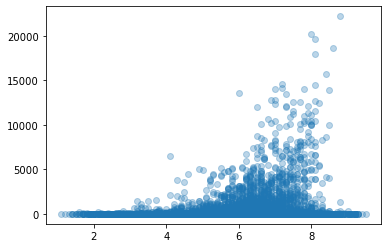

In [29]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['averagerating'], imdb_df['vote_count'], alpha=.3)

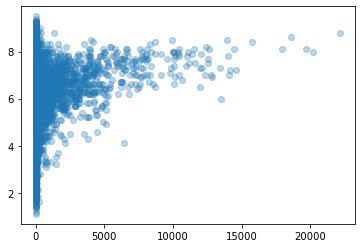

In [30]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['vote_count'], imdb_df['averagerating'], alpha=.3)

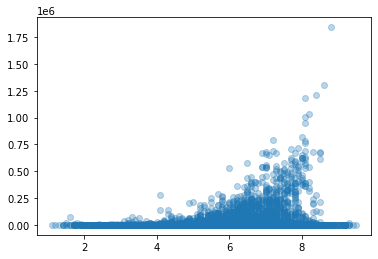

In [31]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['averagerating'], imdb_df['numvotes'], alpha=.3)

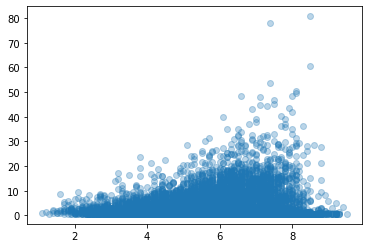

In [32]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['averagerating'], imdb_df['popularity'], alpha=.3)

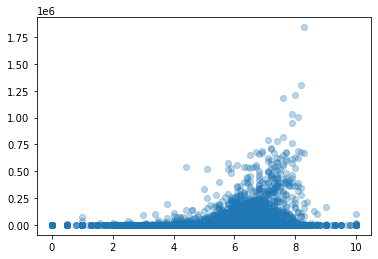

In [33]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['vote_average'], imdb_df['numvotes'], alpha=.3)

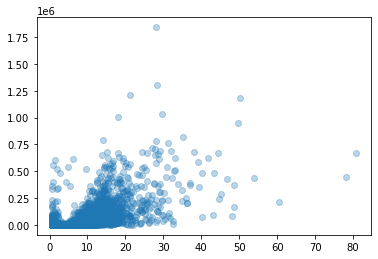

In [34]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['popularity'], imdb_df['numvotes'], alpha=.3)

In [35]:
imdb_df['release_date'] = pd.to_datetime(imdb_df['release_date'])
groupbys = imdb_df.groupby('averagerating').mean()
groupbys.sort_values(by='averagerating', ascending=False)


numvotes  ordering  popularity  vote_average  vote_count
averagerating                                                             
9.5             829.000000  3.000000    0.600000     10.000000    1.000000
9.4               5.000000  1.000000    3.259000      6.800000   30.000000
9.3            4337.750000  1.500000    0.807500      5.700000    2.500000
9.2              21.250000  1.166667    0.996500      6.816667    3.416667
9.1              43.375000  1.000000    0.962375      7.137500    5.375000
...                    ...       ...         ...           ...         ...
1.5            4887.333333  2.000000    1.263333      2.000000   15.000000
1.4             296.333333  1.000000    1.491667      4.166667    4.000000
1.3             369.000000  3.000000    0.600000      1.000000    2.000000
1.2             392.000000  1.000000    1.400000      1.300000    3.000000
1.1             126.000000  1.000000    0.868000      1.000000    3.000000

[85 rows x 5 columns]

## combining names and job to imdb df to get correlation between certain names and ratings

In [36]:
imdb_crew

tconst                      directors              writers
0       tt0285252                      nm0899854            nm0899854
1       tt0438973                            NaN  nm0175726,nm1802864
2       tt0462036                      nm1940585            nm1940585
3       tt0835418                      nm0151540  nm0310087,nm0841532
4       tt0878654  nm0089502,nm2291498,nm2292011            nm0284943
...           ...                            ...                  ...
146139  tt8999974                     nm10122357           nm10122357
146140  tt9001390                      nm6711477            nm6711477
146141  tt9001494          nm10123242,nm10123248                  NaN
146142  tt9004986                      nm4993825            nm4993825
146143  tt9010172                            NaN            nm8352242

[146144 rows x 3 columns]

In [37]:
imdb_name_basics

nconst         primary_name  birth_year  death_year  \
0       nm0061671    Mary Ellen Bauder         NaN         NaN   
1       nm0061865         Joseph Bauer         NaN         NaN   
2       nm0062070           Bruce Baum         NaN         NaN   
3       nm0062195         Axel Baumann         NaN         NaN   
4       nm0062798          Pete Baxter         NaN         NaN   
...           ...                  ...         ...         ...   
606643  nm9990381         Susan Grobes         NaN         NaN   
606644  nm9990690          Joo Yeon So         NaN         NaN   
606645  nm9991320       Madeline Smith         NaN         NaN   
606646  nm9991786  Michelle Modigliani         NaN         NaN   
606647  nm9993380       Pegasus Envoyé         NaN         NaN   

                                      primary_profession  \
0              miscellaneous,production_manager,producer   
1             composer,music_department,sound_department   
2                             miscellaneous,actor,writer   
3       camera_department,cinematographer,art_department   
4       production_designer,art_department,set_decorator   
...                                                  ...   
606643                                           actress   
606644                                           actress   
606645                                           actress   
606646                                          producer   
606647                             director,actor,writer   

                               known_for_titles  
0       tt0837562,tt2398241,tt0844471,tt0118553  
1       tt0896534,tt6791238,tt0287072,tt1682940  
2       tt1470654,tt0363631,tt0104030,tt0102898  
3       tt0114371,tt2004304,tt1618448,tt1224387  
4       tt0452644,tt0452692,tt3458030,tt2178256  
...                                         ...  
606643                                      NaN  
606644                      tt9090932,tt8737130  
606645                      tt8734436,tt9615610  
606646                                      NaN  
606647                                tt8743182  

[606648 rows x 6 columns]

In [38]:
imdb_principals

tconst  ordering      nconst  category       job  \
0        tt0111414         1   nm0246005     actor       NaN   
1        tt0111414         2   nm0398271  director       NaN   
2        tt0111414         3   nm3739909  producer  producer   
3        tt0323808        10   nm0059247    editor       NaN   
4        tt0323808         1   nm3579312   actress       NaN   
...            ...       ...         ...       ...       ...   
1028181  tt9692684         1   nm0186469     actor       NaN   
1028182  tt9692684         2   nm4929530      self       NaN   
1028183  tt9692684         3  nm10441594  director       NaN   
1028184  tt9692684         4   nm6009913    writer    writer   
1028185  tt9692684         5  nm10441595  producer  producer   

                   characters  
0                 ["The Man"]  
1                         NaN  
2                         NaN  
3                         NaN  
4            ["Beth Boothby"]  
...                       ...  
1028181  ["Ebenezer Scrooge"]  
1028182   ["Herself","Regan"]  
1028183                   NaN  
1028184                   NaN  
1028185                   NaN  

[1028186 rows x 6 columns]

In [39]:
people_df = pd.merge(imdb_principals, imdb_name_basics, on='nconst', how='inner')
people_df

tconst  ordering      nconst  category       job   characters  \
0        tt0111414         1   nm0246005     actor       NaN  ["The Man"]   
1        tt0111414         2   nm0398271  director       NaN          NaN   
2        tt5573596         5   nm0398271  director       NaN          NaN   
3        tt0111414         3   nm3739909  producer  producer          NaN   
4        tt0323808        10   nm0059247    editor       NaN          NaN   
...            ...       ...         ...       ...       ...          ...   
1027907  tt9689618         3  nm10439724     actor       NaN          NaN   
1027908  tt9689618         5  nm10439725  director       NaN          NaN   
1027909  tt9692684         3  nm10441594  director       NaN          NaN   
1027910  tt9692684         4   nm6009913    writer    writer          NaN   
1027911  tt9692684         5  nm10441595  producer  producer          NaN   

                  primary_name  birth_year  death_year  \
0                 Tommy Dysart         NaN         NaN   
1                 Frank Howson      1952.0         NaN   
2                 Frank Howson      1952.0         NaN   
3        Barry Porter-Robinson         NaN         NaN   
4                  Sean Barton      1944.0         NaN   
...                        ...         ...         ...   
1027907       Phillippe Warner         NaN         NaN   
1027908           Xavi Herrero         NaN         NaN   
1027909              Guy Jones         NaN         NaN   
1027910        Sabrina Mahfouz         NaN         NaN   
1027911             Simmer Dim         NaN         NaN   

                                     primary_profession  \
0                                                 actor   
1                                 actor,writer,producer   
2                                 actor,writer,producer   
3                               producer,art_department   
4        editor,editorial_department,assistant_director   
...                                                 ...   
1027907                                             NaN   
1027908                 director,writer,cinematographer   
1027909                                        director   
1027910                                          writer   
1027911                                        producer   

                                known_for_titles  
0        tt0093120,tt0076974,tt0084296,tt0077064  
1        tt0104271,tt0094789,tt0102076,tt0111414  
2        tt0104271,tt0094789,tt0102076,tt0111414  
3        tt0290884,tt0101374,tt0111414,tt1566940  
4        tt0402910,tt1022883,tt0086190,tt0490181  
...                                          ...  
1027907                                      NaN  
1027908                                tt9689618  
1027909                                      NaN  
1027910  tt5191128,tt3254170,tt2319282,tt8452302  
1027911                                tt9692684  

[1027912 rows x 11 columns]

In [40]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027912 entries, 0 to 1027911
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   tconst              1027912 non-null  object 
 1   ordering            1027912 non-null  int64  
 2   nconst              1027912 non-null  object 
 3   category            1027912 non-null  object 
 4   job                 177684 non-null   object 
 5   characters          393171 non-null   object 
 6   primary_name        1027912 non-null  object 
 7   birth_year          234048 non-null   float64
 8   death_year          11843 non-null    float64
 9   primary_profession  974266 non-null   object 
 10  known_for_titles    997445 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 94.1+ MB


In [41]:
people_df.drop('birth_year', axis=1, inplace=True)
people_df.drop('death_year', axis=1, inplace=True)

In [42]:
people_df

tconst  ordering      nconst  category       job   characters  \
0        tt0111414         1   nm0246005     actor       NaN  ["The Man"]   
1        tt0111414         2   nm0398271  director       NaN          NaN   
2        tt5573596         5   nm0398271  director       NaN          NaN   
3        tt0111414         3   nm3739909  producer  producer          NaN   
4        tt0323808        10   nm0059247    editor       NaN          NaN   
...            ...       ...         ...       ...       ...          ...   
1027907  tt9689618         3  nm10439724     actor       NaN          NaN   
1027908  tt9689618         5  nm10439725  director       NaN          NaN   
1027909  tt9692684         3  nm10441594  director       NaN          NaN   
1027910  tt9692684         4   nm6009913    writer    writer          NaN   
1027911  tt9692684         5  nm10441595  producer  producer          NaN   

                  primary_name  \
0                 Tommy Dysart   
1                 Frank Howson   
2                 Frank Howson   
3        Barry Porter-Robinson   
4                  Sean Barton   
...                        ...   
1027907       Phillippe Warner   
1027908           Xavi Herrero   
1027909              Guy Jones   
1027910        Sabrina Mahfouz   
1027911             Simmer Dim   

                                     primary_profession  \
0                                                 actor   
1                                 actor,writer,producer   
2                                 actor,writer,producer   
3                               producer,art_department   
4        editor,editorial_department,assistant_director   
...                                                 ...   
1027907                                             NaN   
1027908                 director,writer,cinematographer   
1027909                                        director   
1027910                                          writer   
1027911                                        producer   

                                known_for_titles  
0        tt0093120,tt0076974,tt0084296,tt0077064  
1        tt0104271,tt0094789,tt0102076,tt0111414  
2        tt0104271,tt0094789,tt0102076,tt0111414  
3        tt0290884,tt0101374,tt0111414,tt1566940  
4        tt0402910,tt1022883,tt0086190,tt0490181  
...                                          ...  
1027907                                      NaN  
1027908                                tt9689618  
1027909                                      NaN  
1027910  tt5191128,tt3254170,tt2319282,tt8452302  
1027911                                tt9692684  

[1027912 rows x 9 columns]

In [43]:
people_df.drop('job', axis=1, inplace=True)
people_df.drop('characters', axis=1, inplace=True)

In [44]:
people_df

tconst  ordering      nconst  category           primary_name  \
0        tt0111414         1   nm0246005     actor           Tommy Dysart   
1        tt0111414         2   nm0398271  director           Frank Howson   
2        tt5573596         5   nm0398271  director           Frank Howson   
3        tt0111414         3   nm3739909  producer  Barry Porter-Robinson   
4        tt0323808        10   nm0059247    editor            Sean Barton   
...            ...       ...         ...       ...                    ...   
1027907  tt9689618         3  nm10439724     actor       Phillippe Warner   
1027908  tt9689618         5  nm10439725  director           Xavi Herrero   
1027909  tt9692684         3  nm10441594  director              Guy Jones   
1027910  tt9692684         4   nm6009913    writer        Sabrina Mahfouz   
1027911  tt9692684         5  nm10441595  producer             Simmer Dim   

                                     primary_profession  \
0                                                 actor   
1                                 actor,writer,producer   
2                                 actor,writer,producer   
3                               producer,art_department   
4        editor,editorial_department,assistant_director   
...                                                 ...   
1027907                                             NaN   
1027908                 director,writer,cinematographer   
1027909                                        director   
1027910                                          writer   
1027911                                        producer   

                                known_for_titles  
0        tt0093120,tt0076974,tt0084296,tt0077064  
1        tt0104271,tt0094789,tt0102076,tt0111414  
2        tt0104271,tt0094789,tt0102076,tt0111414  
3        tt0290884,tt0101374,tt0111414,tt1566940  
4        tt0402910,tt1022883,tt0086190,tt0490181  
...                                          ...  
1027907                                      NaN  
1027908                                tt9689618  
1027909                                      NaN  
1027910  tt5191128,tt3254170,tt2319282,tt8452302  
1027911                                tt9692684  

[1027912 rows x 7 columns]

In [45]:
imdb_df_people_df = pd.merge(imdb_df, people_df, on='tconst', how='inner')
imdb_df_people_df

tconst  averagerating  numvotes  ordering_x            title region  \
0      tt1375666            8.8   1841066           8        Inception     US   
1      tt1375666            8.8   1841066           8        Inception     US   
2      tt1375666            8.8   1841066           8        Inception     US   
3      tt1375666            8.8   1841066           8        Inception     US   
4      tt1375666            8.8   1841066           8        Inception     US   
...          ...            ...       ...         ...              ...    ...   
95648  tt2262461            8.0         5           1  Without a Fight     US   
95649  tt2262461            8.0         5           1  Without a Fight     US   
95650  tt2262461            8.0         5           1  Without a Fight     US   
95651  tt2262461            8.0         5           1  Without a Fight     US   
95652  tt2262461            8.0         5           1  Without a Fight     US   

           genre_ids original_language  popularity release_date  vote_average  \
0      [28, 878, 12]                en       27.92   2010-07-16           8.3   
1      [28, 878, 12]                en       27.92   2010-07-16           8.3   
2      [28, 878, 12]                en       27.92   2010-07-16           8.3   
3      [28, 878, 12]                en       27.92   2010-07-16           8.3   
4      [28, 878, 12]                en       27.92   2010-07-16           8.3   
...              ...               ...         ...          ...           ...   
95648           [99]                en        0.60   2012-04-06           4.3   
95649           [99]                en        0.60   2012-04-06           4.3   
95650           [99]                en        0.60   2012-04-06           4.3   
95651           [99]                en        0.60   2012-04-06           4.3   
95652           [99]                en        0.60   2012-04-06           4.3   

       vote_count  ordering_y     nconst         category       primary_name  \
0           22186           7  nm0001877         composer        Hans Zimmer   
1           22186           4  nm0913822            actor       Ken Watanabe   
2           22186           8  nm0002892  cinematographer      Wally Pfister   
3           22186           1  nm0000138            actor  Leonardo DiCaprio   
4           22186           3  nm0680983          actress         Ellen Page   
...           ...         ...        ...              ...                ...   
95648           2           2  nm4918981           writer      Mark Derewicz   
95649           2           3  nm4918928         producer   Beth-Ann Kutchma   
95650           2           4  nm0176923         composer          Brad Cook   
95651           2           5  nm4917440         composer          Phil Cook   
95652           2           6  nm4919325  cinematographer     Andrew Johnson   

                               primary_profession  \
0            music_department,composer,soundtrack   
1                         actor,producer,director   
2      cinematographer,camera_department,director   
3                           actor,producer,writer   
4                     actress,producer,soundtrack   
...                                           ...   
95648                                      writer   
95649                                    producer   
95650                       actor,editor,director   
95651                                    composer   
95652                             cinematographer   

                              known_for_titles  
0      tt0172495,tt0988045,tt5013056,tt1375666  
1      tt0831387,tt1375666,tt2109248,tt0325710  
2      tt1375666,tt0468569,tt0482571,tt0372784  
3      tt0407887,tt0120338,tt0993846,tt1375666  
4      tt0424136,tt1375666,tt0467406,tt1877832  
...                                        ...  
95648                                tt2262461  
95649                                tt2262461  
95650  tt0160412,tt022648

## exploring category of each job type to see what names have a higher correlation to ratings

In [46]:
imdb_df_people_df['category'].value_counts()

actor                  21260
producer               16191
actress                13820
director               10884
writer                  8915
composer                7453
cinematographer         6049
self                    5524
editor                  3832
production_designer     1264
archive_footage          455
archive_sound              6
Name: category, dtype: int64

## People category vs ratings
Using category to find relation to top ratings

In [47]:
composer_df = imdb_df_people_df[imdb_df_people_df['category'] == 'composer']
composer_df

tconst  averagerating  numvotes  ordering_x             title  \
0      tt1375666            8.8   1841066           8         Inception   
12     tt0816692            8.6   1299334           2      Interstellar   
39     tt0848228            8.1   1183655          36      The Avengers   
72     tt1431045            8.0    820847           6          Deadpool   
88     tt1392170            7.2    795227          29  The Hunger Games   
...          ...            ...       ...         ...               ...   
95617  tt3213224            8.6         5           1          By Jingo   
95638  tt2447742            8.4         5           1         Scrambled   
95639  tt2447742            8.4         5           1         Scrambled   
95650  tt2262461            8.0         5           1   Without a Fight   
95651  tt2262461            8.0         5           1   Without a Fight   

      region      genre_ids original_language  popularity release_date  \
0         US  [28, 878, 12]                en      27.920   2010-07-16   
12        US  [12, 18, 878]                en      28.440   2014-11-05   
39        US  [878, 28, 12]                en      50.289   2012-05-04   
72        US   [28, 12, 35]                en      35.067   2016-02-12   
88        US  [878, 12, 14]                en      14.212   2012-03-23   
...      ...            ...               ...         ...          ...   
95617     US           [18]                en       0.600   2015-11-01   
95638     US       [16, 35]                xx       0.840   2018-04-07   
95639     US       [16, 35]                xx       0.840   2018-04-07   
95650     US           [99]                en       0.600   2012-04-06   
95651     US           [99]                en       0.600   2012-04-06   

       vote_average  vote_count  ordering_y     nconst  category  \
0               8.3       22186           7  nm0001877  composer   
12              8.2       18597           9  nm0001877  composer   
39              7.6       19673           8  nm0006293  composer   
72              7.6       20175          10  nm0432725  composer   
88              7.1       14587          10  nm0006133  composer   
...             ...         ...         ...        ...       ...   
95617           0.0           1           6  nm6565504  composer   
95638           6.7           3           7  nm1947932  composer   
95639           6.7           3           8  nm3785001  composer   
95650           4.3           2           4  nm0176923  composer   
95651           4.3           2           5  nm4917440  composer   

              primary_name                          primary_profession  \
0              Hans Zimmer        music_department,composer,soundtrack   
12             Hans Zimmer        music_department,composer,soundtrack   
39          Alan Silvestri        composer,soundtrack,music_department   
72               Junkie XL        soundtrack,composer,music_department   
88     James Newton Howard        music_department,composer,soundtrack   
...                    ...                                         ...   
95617           Ariel Marx                   composer,music_department   
95638       Peter G. Adams        music_department,composer,soundtrack   
95639         Lucas Cantor  music_department,composer,sound_department   
95650            Brad Cook                       actor,editor,director   
95651            Phil Cook                                    composer   

                              known_for_titles  
0      tt0172495,tt0988045,tt5013056,tt1375666  
12     tt0172495,tt0988045,tt5013056,tt1375666  
39     tt0458339,tt0093773,tt0338348,tt0109830  
72     tt1571234,tt0437086,tt1895315,tt1392190  
88     tt1392170,tt0360717,tt0468569,tt0372784  
...                                        ...  
95617  tt7894510,tt4015500,tt7939428,tt7117594  
95638            tt1974419,tt3253624,tt2005151  
95639  tt1928330,tt0829150,tt1206543,tt3522806  
95650  tt0160412,tt02264

In [48]:
x = composer_df['primary_name'].value_counts().index
x

Index(['Danny Bensi', 'Chris Ridenhour', 'Christopher Cano', 'Paul Brill',
       'Joel Goodman', 'Marco Beltrami', 'Jeff Beal', 'Saunder Jurriaans',
       'T. Griffin', 'Keegan DeWitt',
       ...
       'Michael Baiardi', 'Gary Kotlyar', 'Luke Atencio', 'Theo Green',
       'M.E. Manning', 'Michael Shumway', 'Mark Wind', 'Brian L. Pickett',
       'Charlie Brumley', 'Lev Zhurbin'],
      dtype='object', length=4419)

In [49]:
y = composer_df['primary_name'].value_counts()
y

Danny Bensi         31
Chris Ridenhour     26
Christopher Cano    23
Paul Brill          21
Joel Goodman        20
                    ..
Michael Shumway      1
Mark Wind            1
Brian L. Pickett     1
Charlie Brumley      1
Lev Zhurbin          1
Name: primary_name, Length: 4419, dtype: int64

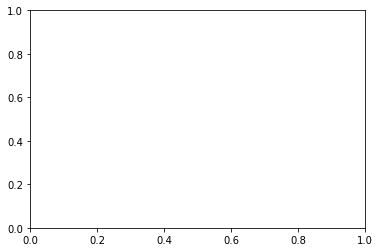

In [50]:
fig, ax = plt.subplots()
